## Convergencia puntual y uniforme de funciones

**Definición**. Sea $\{f_k\}_{k=1}^{\infty}$ de $X$ en $\mathbb{R}$ y $f$ una función de $X$ en $\mathbb{R}$. 
* La suceción $\{f_k\}_{k=1}^{\infty}$ _converge puntualmente_ a $f$ si para cada $x \in X$ y para todo $\epsilon > 0$ existe $n \in \mathbb{N}$ tal que $\mid f_k(x) - f(x) \mid < \epsilon$ para todo $k \geq n$.
* La suceción $\{f_k\}_{k=1}^{\infty}$ _converge uniformemente_ a $f$ si para todo $\epsilon > 0$ existe un $n\in \mathbb{N}$ tal que $\mid f_k(x) - f(x) \mid < \epsilon$ para todo $k \geq n$ y para todo $x \in X$.

La diferencia entre estas dos definiciones se encuentra en el orden de los cuantificadores. Trataremos de mostrar graficamente la diferencia entre estos dos conceptos de manera gráfica. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_function(f, n_samples=1000, lim_inf=-5, lim_sup=5, title=None, error=0):
    fig = plt.figure(figsize=(14,6))
    x = np.linspace(lim_inf, lim_sup, n_samples)
    y = f(x)
    plt.plot(x, y, 'k')
    plt.text(x[-2], y[-2], '$f$', fontsize=16,
             rotation=45, rotation_mode='anchor')
    plt.grid(True)
    if title is not None:
        plt.title(title, fontsize=18)
    if error > 0:
        plt.plot(x, y+error, '#096c28', linestyle='--')
        plt.plot(x, y-error, '#096c28', linestyle='--')
        plt.text(x[-2], (y+error)[-2], '$f + \epsilon$', fontsize=16,
               rotation=45, rotation_mode='anchor')
        plt.text(x[-2], (y-error)[-2], '$f - \epsilon$', fontsize=16,
               rotation=45, rotation_mode='anchor')
    return fig

Prueba de graficación de la función seno:

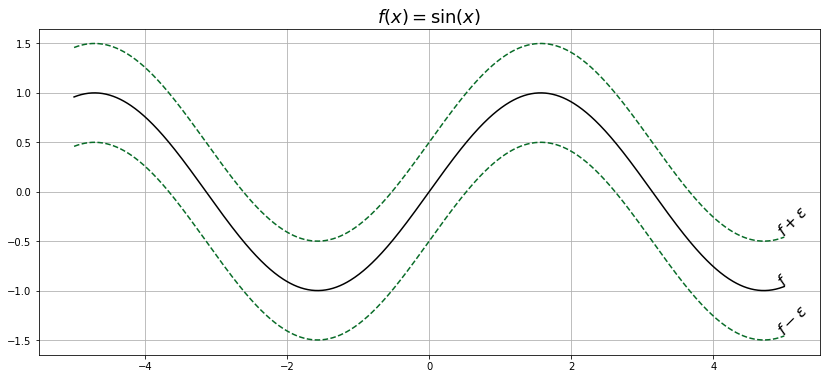

In [3]:
f = plot_function(np.sin, title='$f(x) = \sin (x)$', error=0.5)

In [4]:
def plot_convergence(f, f_k, error=1, k=5, n_functions=3, steps=5, n_samples=10000,
                     lim_inf=-5, lim_sup=5, title=None):
    
    fig = plot_function(f, n_samples, lim_inf, lim_sup, title, error)
    x = np.linspace(lim_inf, lim_sup, n_samples)
    n_ = [k + steps*i for i in range(n_functions)]
    
    for i in n_:
        y_k = f_k(x, i)
        plt.plot(x, y_k, 'r', linestyle=':')
    
    return fig  

#### Ejemplo de sucesión de  funciones que converge puntualmente pero no uniformemente

Consideremos la sucesión de funciones $f_k(x) = \frac{kx}{1 + (xk)^2}$ definidas en $(0, \infty)$. Se puede demostrar que esta sucesión converge puntualmente a $f(x) = 0$. Sin embargo, esta función no converge uniformemente a $f$.

Para ver esto, sea $0 < \epsilon < \frac{1}{2}$. Se sigue inmediatamente que si $x = \frac{1}{k}$, entonces $\mid f_k(x) \mid = \frac{1}{2} > \epsilon$. Por tanto la suceción $f_k$ no converge uniformemente a $f$.



Tratemos de reafirmar lo anterior gráficamente. Fijemos nuestro error (nuestro $\epsilon$) en $0.3$ (menor que $\frac{1}{2}$).

A partir de $k=1$ tenemos los siguientes 5 ejemplos:

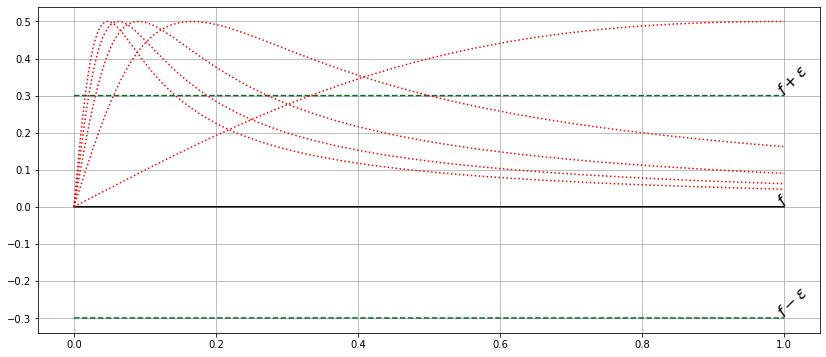

In [5]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=1, n_functions=5, lim_inf=0, lim_sup=1)

Podemos observar que en todas las $f_k$ su gráfica está _fuera_ de la banda de error de $f$. Pero tal vez, podríamos preguntarnos, si aumentamos el valor de la $k$, de alguna manera todas las gráficas de $f_k$ _queden_ dentro de la banda de error. Veamos que este no es el caso.

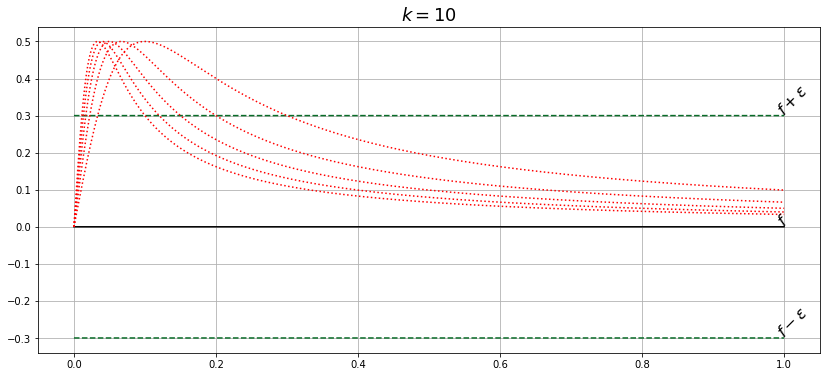

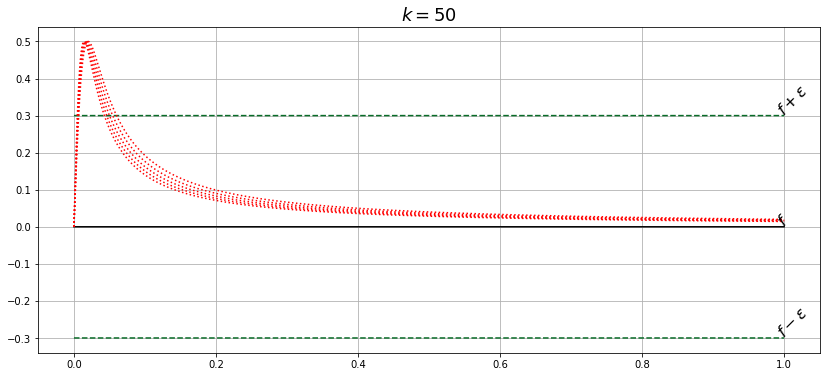

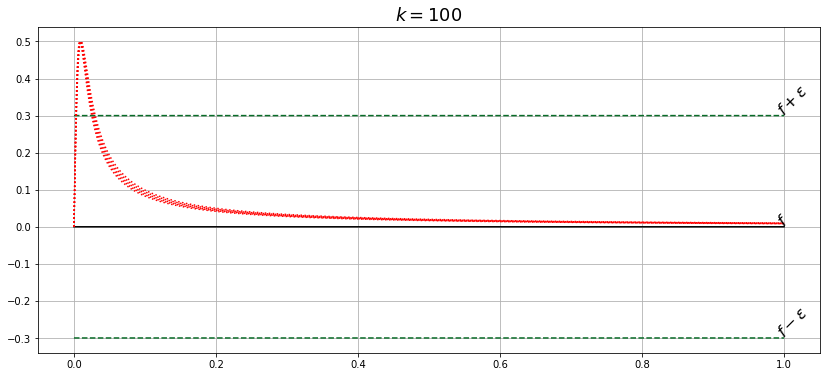

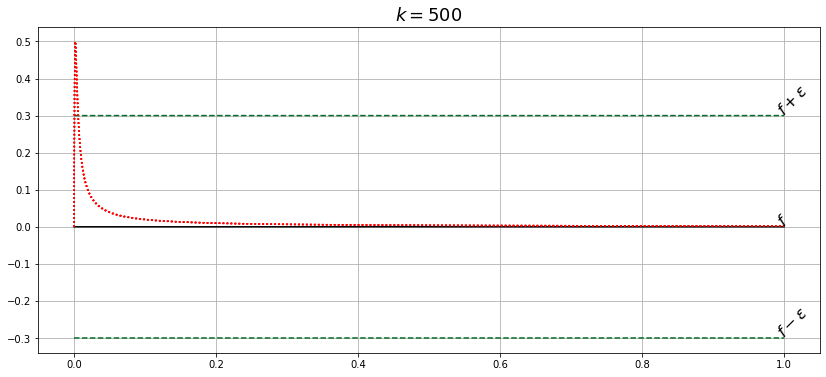

In [6]:
for el in [10, 50, 100, 500]:
    plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=el, n_functions=5, lim_inf=0, lim_sup=1, title=f'$k={el}$')

Como podemos constatar, aunque vayamos variando la $k$, siempre encontramos un valor en el dominio tal que la gráfica de $f_k$ se _sale_ del rango de error.

#### Sucesión de funciones  que converge uniformemente

Consideremos la sucesión $f_k(x) = \frac{x}{1 + kx^2}$. Esta sucesión converge uniformemente a $f(x) = 0$ en todos los reales. Para ver esto, sea $\epsilon > 0$...

Comprobemos lo anterior graficamente. Fijemos el error igual a $0.1$. Para $k=1$ tenemos,


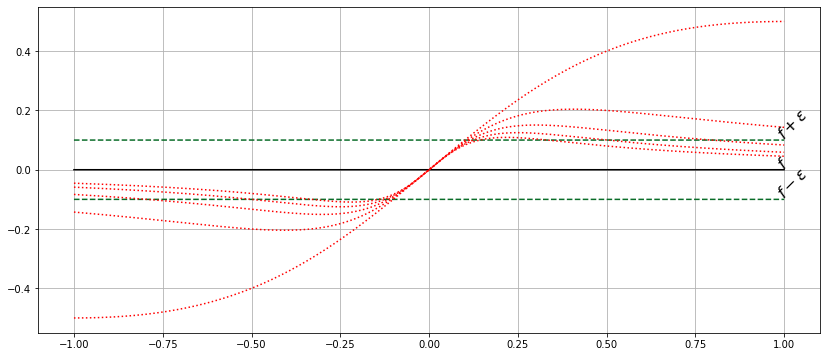

In [7]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: x / (1 + np.square(x)*k),
                     error=0.1, k=1, n_functions=5, lim_inf=-1, lim_sup=1)

Como podemos comprobar, la gráfica de varios términos de la sucesión a partir de $k=1$ quedan fuera del rango de error. Tratemos de ver si para alguna $k$ más grande, la sucesión se acerca a cero para toda $x$.

Para $k=10$ tenemos

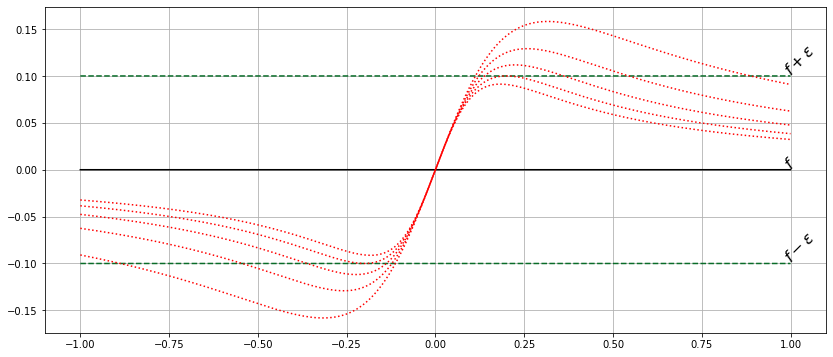

In [8]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: x / (1 + np.square(x)*k),
                     error=0.1, k=10, n_functions=5, lim_inf=-1, lim_sup=1)

Aún quedan valores fuera. Tratemos con una $k$ más grande.

Para $k=50$, tenemos

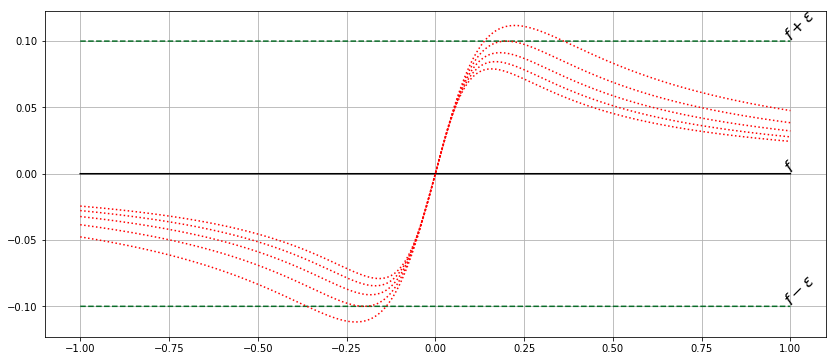

In [9]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: x / (1 + np.square(x)*k),
                     error=0.1, k=20, n_functions=5, lim_inf=-1, lim_sup=1)

Podemos constatar, aunque sea de manera gráfica, que cuando aumentamos la $k$ la sucesión queda dentro de la banda deseada. 

Para $k=100$,

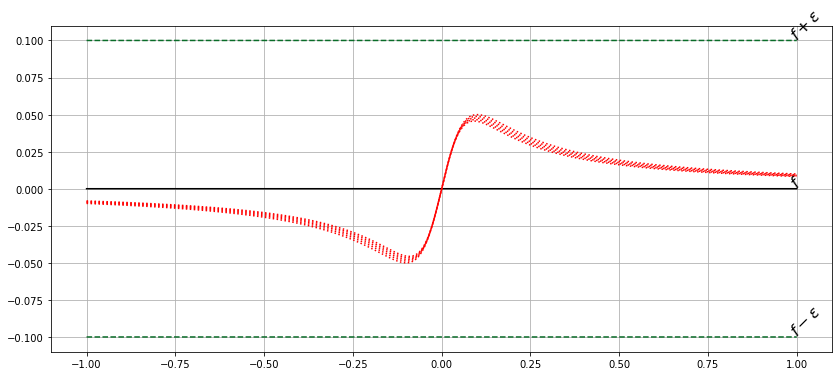

In [10]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: x / (1 + np.square(x)*k),
                     error=0.1, k=100, n_functions=5, lim_inf=-1, lim_sup=1)

### Teorema de Egorov

Recordemos el enunciado de este teorema. 

**Teorema**. Sea $(X, \mathcal{S}, \mu)$ en espacio de medida con $ \mu(X) < \infty$. Sea $\{f_k\}_{k=1}^{\infty}$ una sucesión de funciones $\mathcal{S}$-medibles de $X$ en $\mathbb{R}$ que converge puntualmente en $X$ a una función $f: X \rightarrow \mathbb{R}$. Entonces para todo $\epsilon > 0$, existe un conjunto $E\in \mathcal{S}$ tal que $\mu(X \setminus E) < \epsilon$ y  $\{f_k\}_{k=1}^{\infty}$ converge uniformemente a $f$ en $E$.

La demostración de este teorema se ve en clase. Tratemos de comprobar este teorema utilizando el primer ejemplo de este documento.

Consideremos de nuevo la sucesión $f_k(x) = \frac{kx}{1 + (xk)^2}$ ahora definidas en $(0, 1)$. Fijemos nuestro error (el de convergencia) en $0.3$ y sea $\epsilon = 0.2$. El Teorema de Egorov nos dice que existe un subconjunto $E$ en $(0, 1)$ tal que $\mu((0,1) \setminus E) < 0.2$ y que la sucesión converge uniformemente en $E$.

Probemos con el conjunto $E = (0.1, 1)$. Es claro que $\mu((0,1) \setminus E) < 0.2$. Veamos que $f_k$ converge uniformemente en $E$.

Para $k=1$

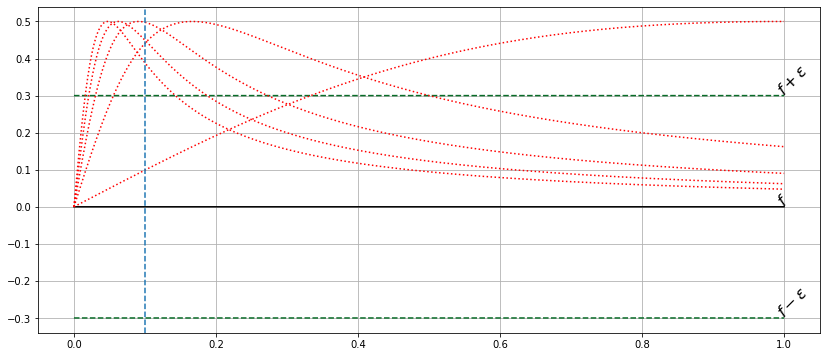

In [11]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=1, n_functions=5, lim_inf=0, lim_sup=1)
plt.axvline(x=0.1, linestyle='--')

Para $k=10$,

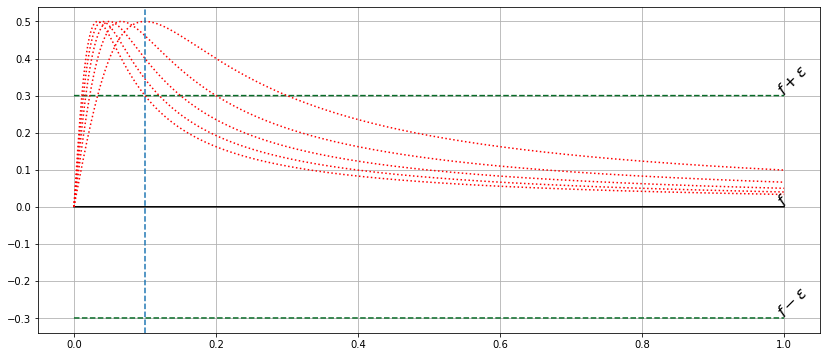

In [12]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=10, n_functions=5, lim_inf=0, lim_sup=1)
plt.axvline(x=0.1, linestyle='--')

Para $k=25$,

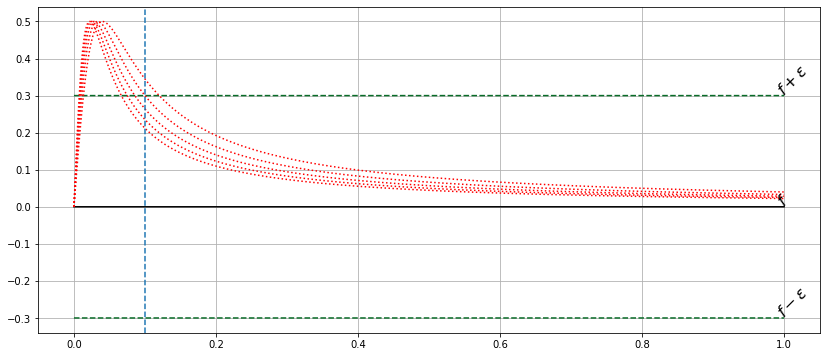

In [13]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=25, n_functions=5, lim_inf=0, lim_sup=1)
plt.axvline(x=0.1, linestyle='--')

Para $k= 50$,

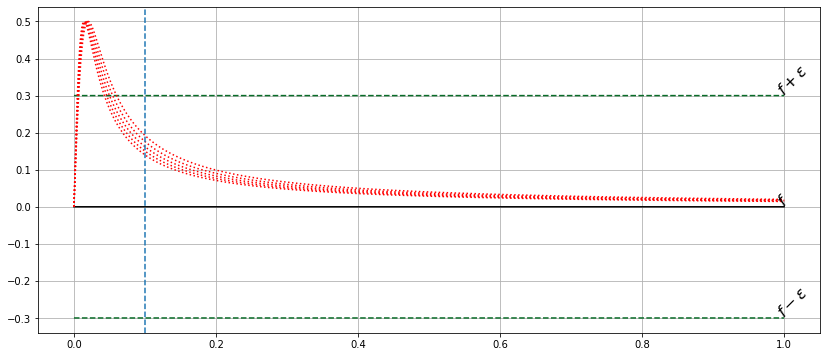

In [14]:
f = plot_convergence(lambda x: np.zeros(x.size), lambda x, k: k*x / (1 + np.square(x)*k**2),
                     error=0.3, k=50, n_functions=5, lim_inf=0, lim_sup=1)
plt.axvline(x=0.1, linestyle='--')

Como podemos observar, la función converge uniformemente en $E = (0.1, 1)$